#                                Machine Learning using Python

**Problem Statement :**
Analyse the data set provided,  Do Exporatory Data Analysis, Visualize the Data and find all principal componenets from dataset. From the preprocessed Dataset create a ML model ( Linear Regression) to predict the output and calculate the Error associated with the model created. (Predict the fish weight)

# Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

In [4]:
fish_weight = pd.read_csv('fish.csv')
fish_weight.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
fish_weight.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [8]:
fish_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


# Visualizing the given dataset

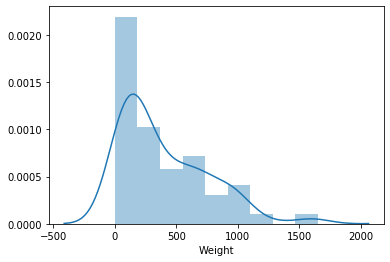

In [9]:
# distribution plot
sns.distplot(fish_weight['Weight'])

In [10]:
fish_weight.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


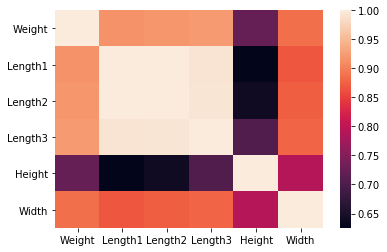

In [11]:
# heat map
sns.heatmap(fish_weight.corr())

In [13]:
Mean = fish_weight["Weight"].mean()
Mean

398.3264150943396

# Creating training set and test set

In [14]:
# distributing the dataset into two components X and Y 
X = fish_weight[['Length1','Length2','Length3','Height','Width']] 
y = fish_weight['Weight']

In [15]:
# splitting X and Y into Training set and Test set 
from sklearn.model_selection import train_test_split

# train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4 , random_state = 101)

In [16]:
# creating and training the model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Evaluation of the model

In [17]:
# printing the intercepts
print(lm.intercept_)

-454.29682535478065


In [18]:
# evaluating the model
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Length1,76.548158
Length2,-40.232347
Length3,-15.084871
Height,19.903676
Width,62.911613


Interpreting the coefficients

Holding all other features fixed:

- a 1 unit increase in **Length1** is associated with an **increase of 76.548158 **. 
- a 1 unit increase in **Length2** is associated with an **decrease of 40.232347 **.


# Predictions from our model

In [19]:
predictions = lm.predict(X_test)

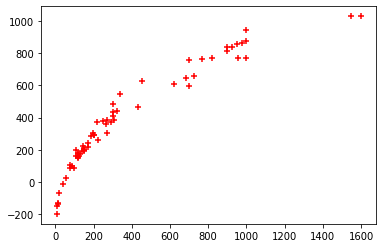

In [20]:
plt.scatter(y_test,predictions,c='red',marker='+')

**Residual Histogram**

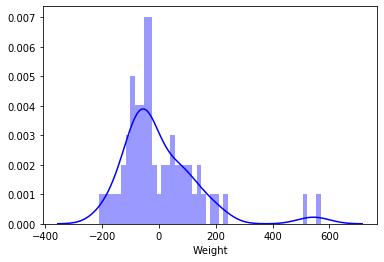

In [21]:
sns.distplot((y_test-predictions),bins=50,color='blue')

### Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


In [24]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 98.0843914139206
MSE: 18827.203999063706
RMSE: 137.21225892413443


In [26]:
MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)

In [27]:
(RMSE/ Mean)*100

34.44719047609159

In [28]:
a = lm.coef_

In [29]:
b = lm.intercept_

In [30]:
def fish_weight(length1,length2,length3,height,width):
    WEIGHT= a[0]*length1 + a[1]*length2 + a[2]*length3 + a[3]*height + a[4]*width + b
    return WEIGHT

In [31]:
fish_weight(12,10,11,8,18)

1187.6624730770093

In [32]:
length1=12
length2=13
length3=11
height=8
width=8

In [33]:
print("THE WEIGHT OF THE FISH IS EXPECTED TO BE")
print(fish_weight(length1,length2,length3,height,width))

THE WEIGHT OF THE FISH IS EXPECTED TO BE
437.8493005715067


<img src="https://www.lewisandclarkriverboat.com/uploads/1/0/5/4/10548146/edited/divider_1.png?1508958214">